In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/MyDrive/Quiz2Mv/"

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

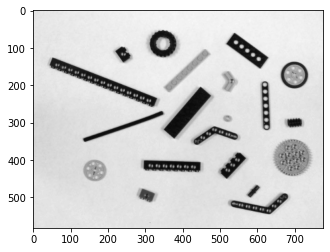

In [ ]:
#read image from directory and convert it to gray scale
image = cv2.imread(path+"lego1.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

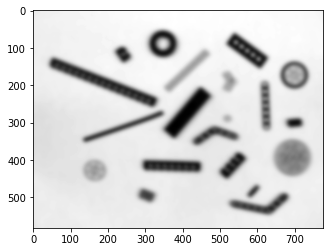

In [ ]:
#apply Gaussian Blur to reduce the noise
blur = cv2.GaussianBlur(gray,(55,55),5)
plt.imshow(blur, cmap='gray')

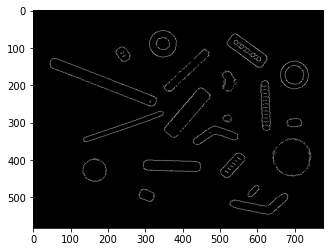

In [ ]:
#Find the edge using Canny edge detection
canny = cv2.Canny(blur,20,30)
plt.imshow(canny, cmap='gray')

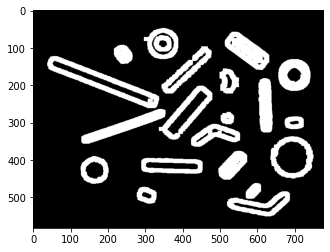

In [ ]:
#Apply dilation operation to the binary image in order to add some pixels and increase the foreground objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated = cv2.dilate(canny, kernel, iterations=5)
plt.imshow(dilated, cmap='gray')

20 objects were found in this image.


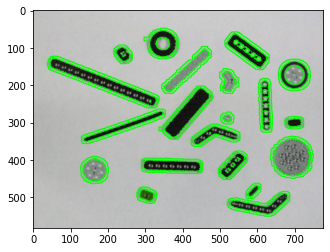

In [ ]:
#Find the countours and count the number of countour exist in the image 
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
print(len(contours), "objects were found in this image.")

#cv2.imshow("Dilated image", dilated)
#cv2.imshow("contours", image_copy)
plt.imshow(image_copy)

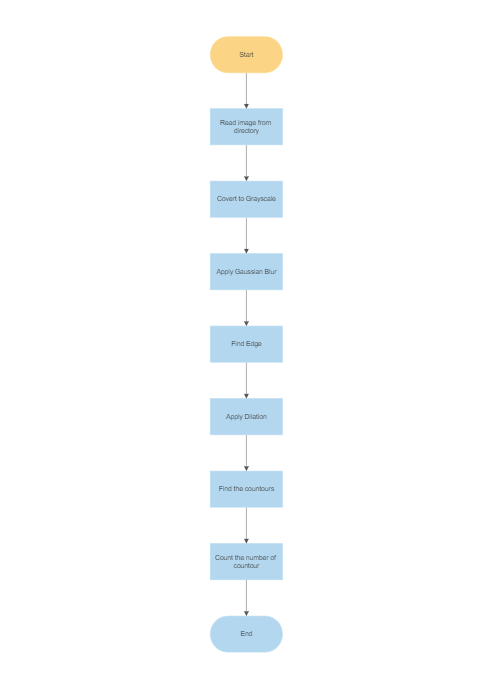